<h1 style="text-align: center;"> Smoothen Curves</h1>


## 1. [Savitzky–Golay filter](https://scipy.github.io/old-wiki/pages/Cookbook/SavitzkyGolay)



`It uses least squares to regress a small window of your data onto a polynomial, then uses the polynomial to estimate the point in the center of the window. Finally the window is shifted forward by one data point and the process repeats. This continues until every point has been optimally adjusted relative to its neighbors. It works great even with noisy samples from non-periodic and non-linear sources.`

**Syntax example:**

In [20]:
from scipy.signal import savgol_filter
yhat = savgol_filter(y, 51, 3) # window size 51, polynomial order 3

**Application Example:**

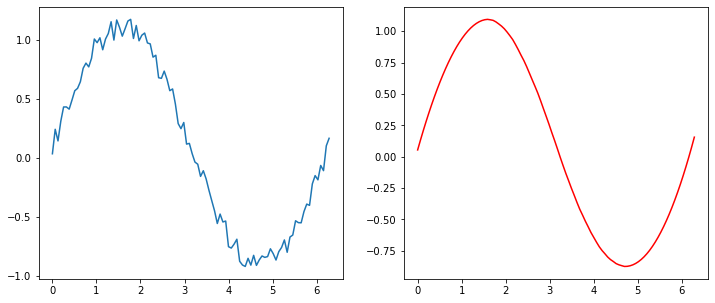

In [31]:
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(0,2*np.pi,100)
y = np.sin(x) + np.random.random(100) * 0.2
yhat = savgol_filter(y, 51, 3) # window size 51, polynomial order 3


fig, ((ax1),(ax2)) = plt.subplots(nrows=1, ncols=2, figsize=(12,5) )
ax1.plot(x,y)
ax2.plot(x,yhat, color='red')
plt.show()

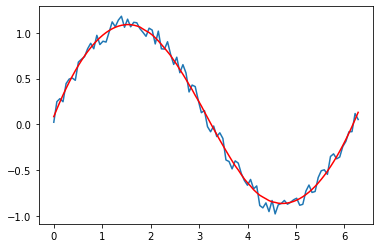

In [33]:
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(0,2*np.pi,100)
y = np.sin(x) + np.random.random(100) * 0.2
yhat = savgol_filter(y, 51, 3) # window size 51, polynomial order 3

plt.plot(x,y)
plt.plot(x,yhat, color='red')
plt.show()

## 2. Discrete Fourier transform of a real sequence.

#### Syntax:

`scipy.fftpack.rfft(x, n=None, axis=- 1, overwrite_x=False)`

 
f(x)


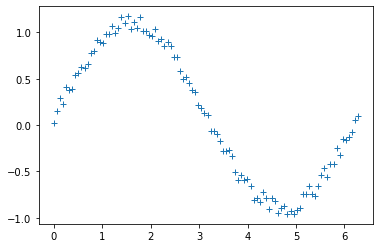

In [12]:
import numpy as np
import scipy.fftpack
import pylab as plt

N = 100
x = np.linspace(0,2*np.pi,N)
y = np.sin(x) + np.random.random(N) * 0.2

w = scipy.fftpack.rfft(y)
f = scipy.fftpack.rfftfreq(N, x[1]-x[0])
spectrum = w**2

cutoff_idx = spectrum < (spectrum.max()/5)
w2 = w.copy()
w2[cutoff_idx] = 0

# filter y
y2 = scipy.fftpack.irfft(w2)
print(' ')
print("f(x)")

plt.plot(x, y, '+')
plt.show()

## $f(x)$ Filtered

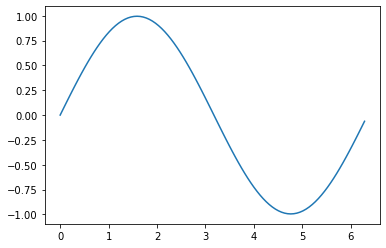

In [6]:
plt.plot(x, y2)
plt.show()

## 3. Smoothing based on a moving average box (by convolution)

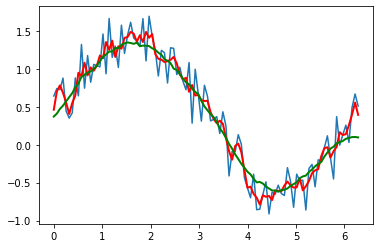

In [37]:
x = np.linspace(0,2*np.pi,100)
y = np.sin(x) + np.random.random(100) * 0.8

def smooth(y, box_pts):
    box = np.ones(box_pts)/box_pts
    y_smooth = np.convolve(y, box, mode='same')
    return y_smooth

plt.plot(x, y)

plt.plot(x, smooth(y,3), 'r-', lw=2)
plt.plot(x, smooth(y,19), 'g-', lw=2)

plt.show()

## 4. Smoothing using Lowess

**LOcally WEighted Scatterplot Smoothing**

If you'd like to use [LOWESS(Local regression)](https://en.wikipedia.org/wiki/Local_regression) to fit your data (it's similar to a moving average but more sophisticated), you can do that using the [statsmodels library](https://pypi.org/project/statsmodels/):

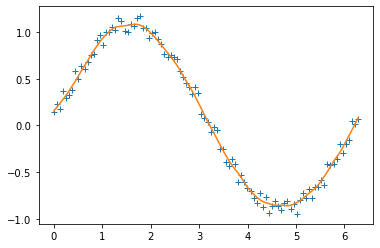

In [38]:
import numpy as np
import pylab as plt
import statsmodels.api as sm

x = np.linspace(0,2*np.pi,100)
y = np.sin(x) + np.random.random(100) * 0.2
lowess = sm.nonparametric.lowess(y, x, frac=0.1)

plt.plot(x, y, '+')
plt.plot(lowess[:, 0], lowess[:, 1])
plt.show()

-----------------------

## 5. [The Goldilocks Trio](https://towardsdatascience.com/data-smoothing-for-data-science-visualization-the-goldilocks-trio-part-1-867765050615)
***
### For Time Series data
### piecewise function curves

 Consider the flight of a bird, perhaps conditioned by instinct, but still moving according to its own free will, or even a flock of birds following whichever bird is out front at any moment. There isn’t a reason to expect that it’s appropriate to model the trajectory with a single set of coefficients, as the bird (or flock) could change its intention in mid-flight.   


The first part involves two functions: 
- **curve1:** for the trajectory before the bird has changed her flight plan 
- **curve2:** for afterward.



In [40]:

import numpy as np 

def curve1(in_array_ ):
    return (in_array_**3) + ((in_array_*.9-4)**2)

def curve2(in_array_ ):
    return (20*np.sin((in_array_)*3+4)+20) + curve1(in_array_ )

### Plotting curve1 and curve2

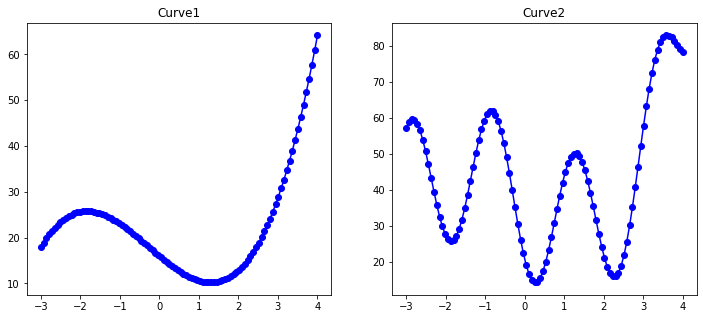

In [63]:
in_array = np.linspace(-3, 4, 100) 
# plt.scatter(in_array, curve1(in_array), color = 'blue', marker = "o") 

fig, ((ax1),(ax2)) = plt.subplots(nrows=1, ncols=2, figsize=(12,5) )
ax1.plot(in_array, curve1(in_array), color = 'blue', marker = "o")
ax1.title.set_text('Curve1')
ax2.plot(in_array, curve2(in_array), color = 'blue', marker = "o")
ax2.title.set_text('Curve2')
plt.show()

### piecewise function - discreet plot

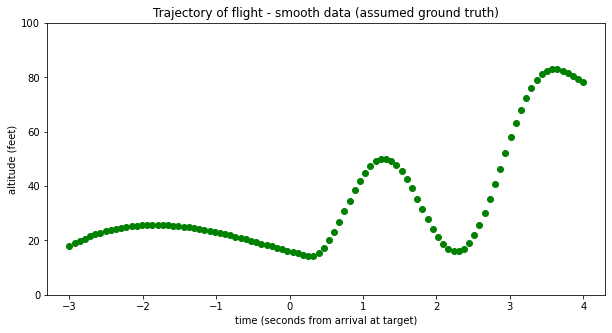

In [49]:
import matplotlib.pyplot as plt

in_array = np.linspace(-3, 4, 100) 
x = in_array

# allows a list of lambda operators to act on different portions of the 
# data range, implementing function curve1 for the range below 0.2 and 
# function curve2 for the range of 0.2 and above.

curve = np.piecewise(x, [x<.2, x >=.2], [lambda x: curve1(x), lambda x: curve2(x)])

y_axis_label = 'altitude (feet)'
x_axis_label = 'time (seconds from arrival at target)'
title = 'Trajectory of flight'
figure_proportions = (10, 5)
x_min, x_max = -3.3, 4.3
y_max = 100

custom_title = title + ' - smooth data (assumed ground truth)'
plt.figure(figsize=figure_proportions ) 
plt.scatter(in_array, curve, color = 'green', marker = "o") 
plt.title(custom_title) 
plt.xlabel(x_axis_label) 
plt.ylabel(y_axis_label) 
plt.xlim(x_min, x_max )
plt.ylim(0, y_max )
# plt.savefig('viz/'+custom_title+'.svg')
plt.show()

### piecewise function - line plot

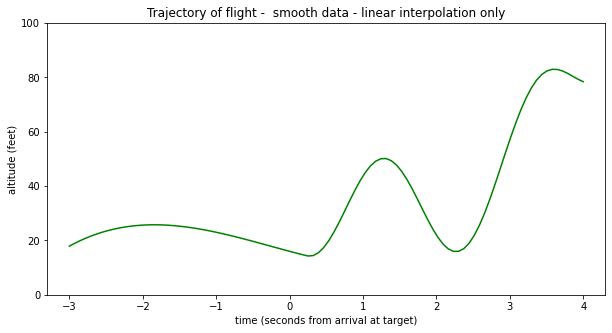

In [65]:
custom_title = title + ' -  smooth data' + ' - linear interpolation only'
plt.figure(figsize=figure_proportions ) 
plt.plot(in_array, curve, color = 'green') 
plt.title(custom_title) 
plt.xlabel(x_axis_label) 
plt.ylabel(y_axis_label)
plt.xlim(x_min, x_max )
plt.ylim(0, y_max )
# plt.savefig('viz/'+custom_title+'.svg')
plt.show()

### '*' Smoothing using The Goldilocks Trio

But what if, instead, it’s **not a single bird** but rather a **flock of birds**?

In [66]:
import numpy as np 
import matplotlib.pyplot as plt

in_array = np.linspace(-3, 4, 100) 
def curve1(in_array_ ):
    return (in_array_**3) + ((in_array_*.9-4)**2)
def curve2(in_array_ ):
    return (20*np.sin((in_array_)*3+4)+20) + curve1(in_array_ )
    
x = in_array
curve = np.piecewise(x, [x<.2, x >=.2], [lambda x: curve1(x), lambda x: curve2(x)])

**Generate the noise**

In [67]:
flux_range = 35
random_flux = np.random.rand(len(curve))*flux_range - flux_range/2
noisy_data =  curve + random_flux

**The Noise Graph**

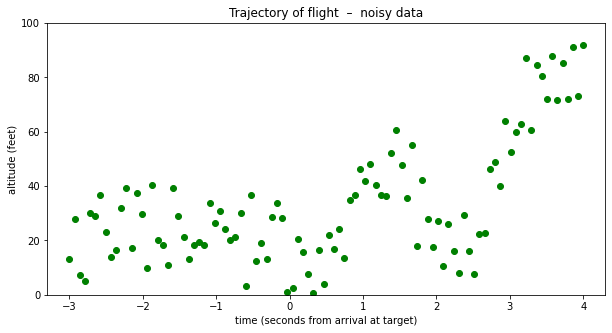

In [68]:
y_axis_label = 'altitude (feet)'
x_axis_label = 'time (seconds from arrival at target)'
title = 'Trajectory of flight'
custom_title = title + '  –  noisy data'
figure_proportions = (10, 5)
y_max = 100
x_min, x_max = -3.3, 4.3

plt.figure(figsize=figure_proportions)

plt.scatter(in_array, noisy_data, color = 'green', marker = "o") 
plt.title(custom_title) 
plt.xlabel(x_axis_label) 
plt.ylabel(y_axis_label) 
plt.xlim(x_min, x_max )
plt.ylim(0, y_max )
# plt.savefig('viz/'+custom_title+'.svg')
plt.show()

**Smoothening Noise data graph**
 -  step increment of the NumPy array indexing

In [69]:
sampling_increment = 15
sparse_input = in_array[::sampling_increment]
sparse_data =     curve[::sampling_increment]

### The sparse plot

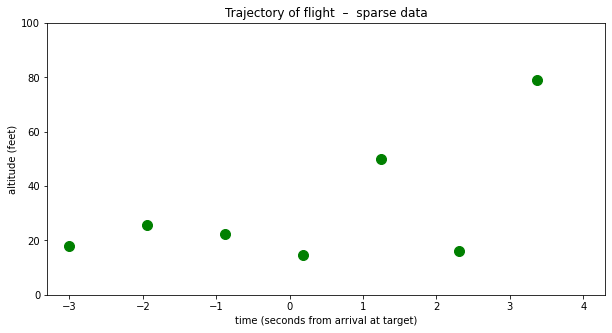

In [70]:
custom_title = title + '  –  sparse data'

plt.figure(figsize=figure_proportions) 
plt.scatter(sparse_input, sparse_data, color = 'green', marker = "o", s=100)

plt.title(custom_title) 
plt.xlabel(x_axis_label) 
plt.ylabel(y_axis_label) 
plt.xlim(x_min, x_max )
plt.ylim(0, y_max )
# plt.savefig('viz/'+custom_title+'.svg')
plt.show()

In [72]:
def graph(x_array, y_array, custom_title, scatter=True, solid_line=False, line_viz = None):
    ''' This function can accept basic x and y arrays for a basic 
    scatter plot or line plot (or both), but it can also accept, 
    in its line_viz parameter, a list of x, y array pairs.
    Its configuration for coloring, line weight, and dot size are 
    tailored specifically for the smoothing examples presented in 
    this blog.'''
    
    # Set up the plotting
    figure_proportions = (10, 5)
    plt.figure(figsize=figure_proportions )    
    x_min, x_max = -3.3, 4.3
    y_max = 100
    y_axis_label = 'altitude (feet)'
    x_axis_label = 'time (seconds from arrival at target)'
    title = 'Trajectory of flight'
    custom_title = title + ' - ' + custom_title
    plt.title(custom_title)         
    dot_opacity = line_opacity = 1
    size = 30 if len(x_array) > 15 else 100 
    line_weight=1
    
    # Handle the cases where lines or curves are visualized, 
    # beyond the obvious
    if line_viz != None:
        if len(line_viz) == 1:
            colors = ['green']
        if len(line_viz) ==2:
            colors = ['lightseagreen', 'olive']
            dot_opacity = .3
            line_weight = 3
        if len(line_viz) == 4:
            dot_opacity = .1
            line_opacity = .1
            colors = ['turquoise', 'magenta','tomato', 'gold']           
        for i, (x, y) in enumerate(line_viz):
            plt.plot(x, y, color = colors[i], lw=3)
    
    # Handle the standard cases
    if scatter:
        plt.scatter(x_array, y_array, color = 'green', marker = "o", alpha = dot_opacity, s=size) 
    if solid_line:
        plt.plot(x_array, y_array, color = 'green', alpha = line_opacity)
    # Present the plotting
    plt.xlabel(x_axis_label) 
    plt.ylabel(y_axis_label) 
    plt.xlim(x_min, x_max )
    plt.ylim(0, y_max )
#     plt.savefig('viz/'+custom_title+'.svg')
    plt.show()

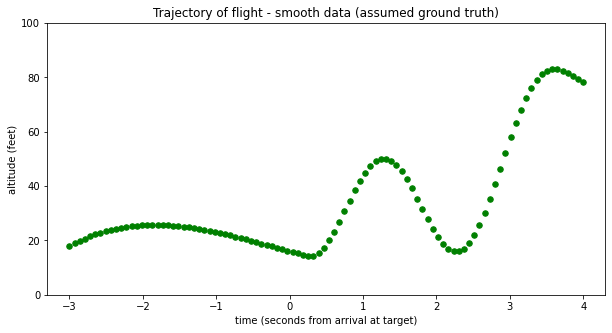

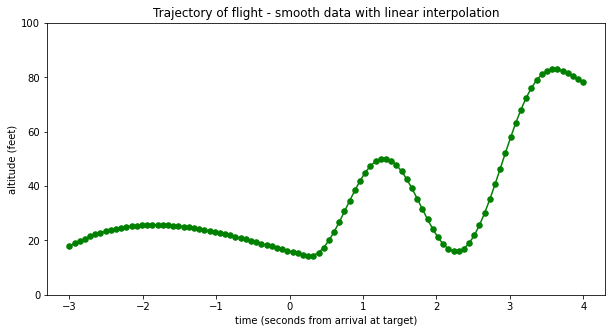

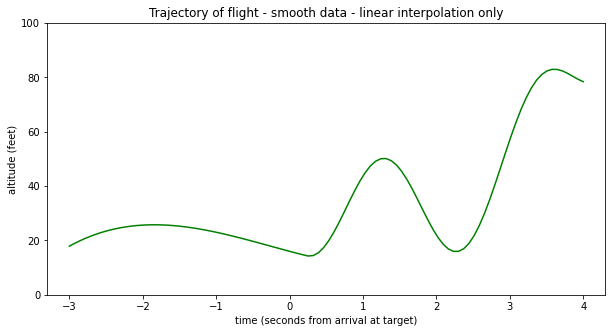

In [73]:
title_suffix = 'smooth data (assumed ground truth)'
graph(in_array, curve, title_suffix , scatter=True, solid_line=False)

title_suffix = 'smooth data' + ' with linear interpolation'
graph(in_array, curve, title_suffix, scatter=True, solid_line=True)

title_suffix = 'smooth data' + ' - linear interpolation only'
graph(in_array, curve, title_suffix, scatter=False, solid_line=True)

### (Not recommended List)

### Linear Interpolation  

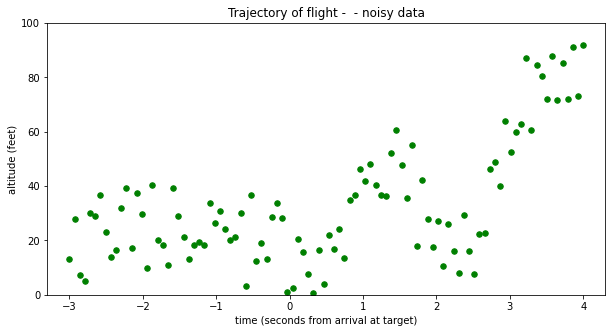

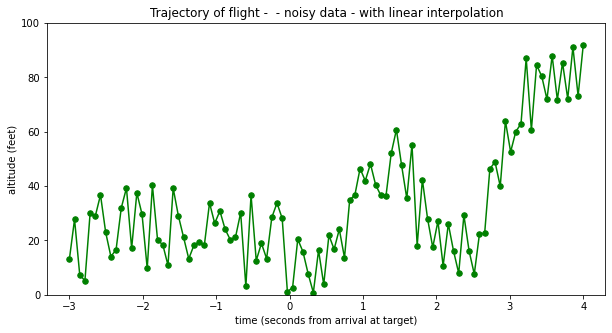

In [74]:
title_suffix = ' - noisy data'
graph(in_array, noisy_data, title_suffix, scatter=True, solid_line=False)

title_suffix =  ' - noisy data'+ ' - with linear interpolation'
graph(in_array, noisy_data,  title_suffix, scatter=True, solid_line=True)

### Linear Regression

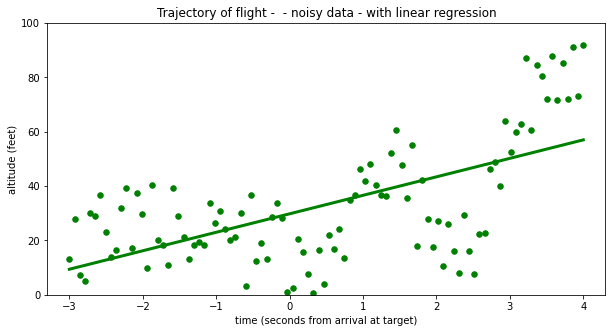

In [75]:
m, b = np.polyfit(in_array, noisy_data, 1)

title_suffix =  ' - noisy data'+ ' - with linear regression'
graph(in_array, noisy_data,  title_suffix, scatter=True, solid_line=False, line_viz = [(in_array, m*x+b)])


### Polynomial Regression (3rd degree)

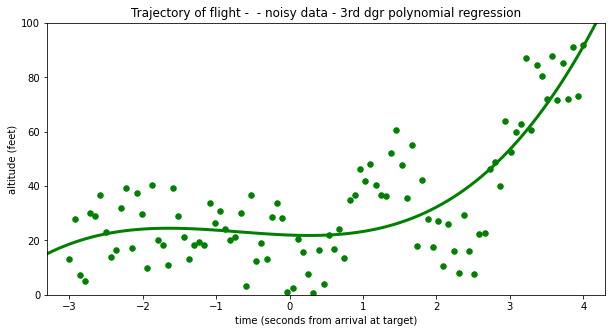

In [76]:
x_min, x_max = -3.3, 4.3
from numpy.polynomial import polynomial as P
z = np.polyfit(in_array, noisy_data, 3)
p = np.poly1d(z)
xp = np.linspace(x_min, x_max, 100)

title_suffix = ' - noisy data'+ ' - 3rd dgr polynomial regression'
graph(in_array, noisy_data,  title_suffix, scatter=True, solid_line=False, line_viz = [(xp, p(xp))])


### Polynomial Regression (20th degree)

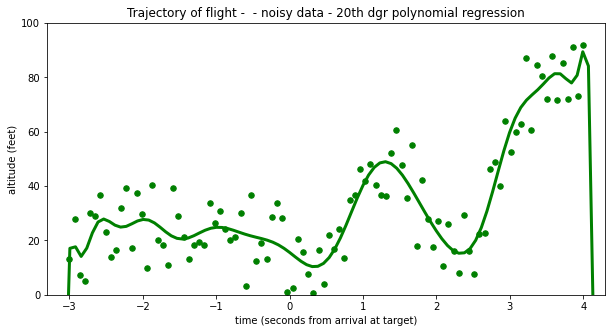

In [77]:
z = np.polyfit(in_array, noisy_data, 20)
p = np.poly1d(z)
xp = np.linspace(x_min, x_max, 100)

title_suffix = ' - noisy data'+ ' - 20th dgr polynomial regression'
graph(in_array, noisy_data,  ' - noisy data'+ ' - 20th dgr polynomial regression', scatter=True, solid_line=False, line_viz = [(xp, p(xp))])


### Moving Average

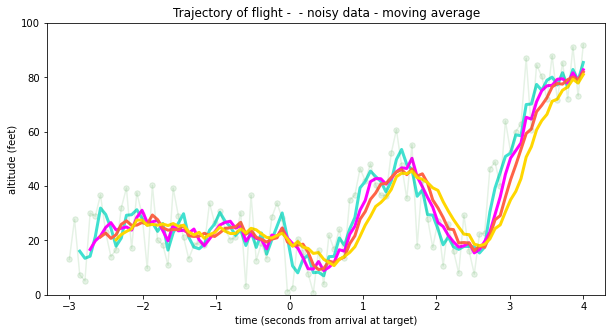

In [78]:
import pandas as pd
noisy_data_series = pd.Series(noisy_data)

# Use pandas's rolling method to generate a list of moving average series based on different bin sizes
bin_sizes = [3, 5, 7, 10]
mvg_avg_list = [ (in_array, noisy_data_series.rolling(bin_size).mean()) for bin_size in bin_sizes ]
title_suffix = ' - noisy data'+ ' - moving average'
graph(in_array, noisy_data, title_suffix, scatter=True, solid_line=True, line_viz = mvg_avg_list)

**linear interpolation to attempt to smooth the sparsely sampled data.**

In [87]:
#samling

sampling_increment = 15
sparse_input = in_array[::sampling_increment]
sparse_data = curve[::sampling_increment]

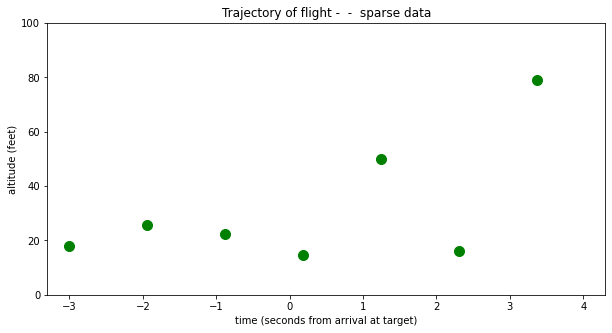

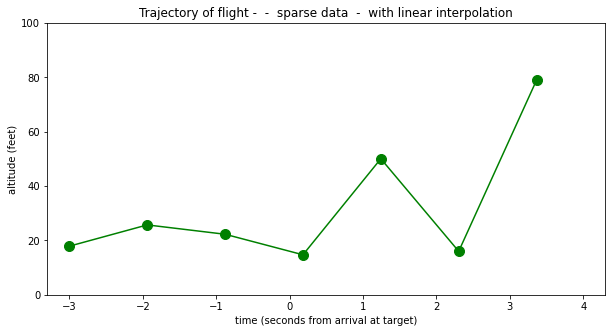

In [88]:
title_suffix = ' -  sparse data'
graph(sparse_input, sparse_data, title_suffix, scatter=True, solid_line=False, line_viz = None)

title_suffix = ' -  sparse data'+ '  -  with linear interpolation'
graph(sparse_input, sparse_data,  title_suffix, scatter=True, solid_line=True, line_viz = None)

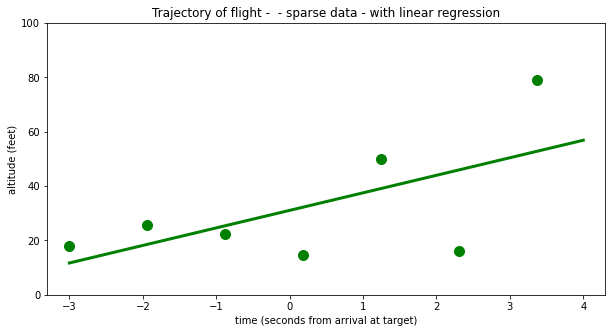

In [89]:
m, b = np.polyfit(sparse_input, sparse_data, 1)

title_suffix =  ' - sparse data'+ ' - with linear regression'
graph(sparse_input, sparse_data,  title_suffix, scatter=True, solid_line=False, line_viz = [(in_array, m*x+b)])

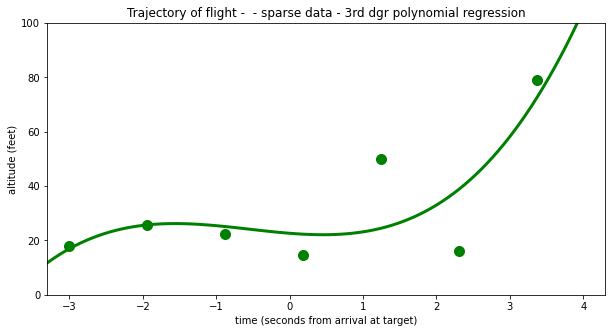

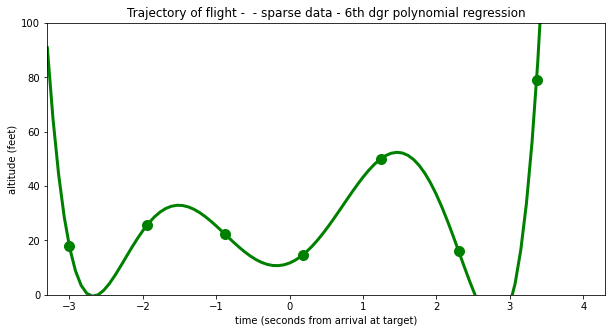

In [90]:
z = np.polyfit(sparse_input, sparse_data, 3)
p = np.poly1d(z)
xp = np.linspace(x_min, x_max, 100)

title_suffix = ' - sparse data'+ ' - 3rd dgr polynomial regression'
graph(sparse_input, sparse_data,  title_suffix, scatter=True, solid_line=False, line_viz = [(xp, p(xp))])

z = np.polyfit(sparse_input, sparse_data, 6)
p = np.poly1d(z)
xp = np.linspace(x_min, x_max, 100)

title_suffix = ' - sparse data'+ ' - 6th dgr polynomial regression'
graph(sparse_input, sparse_data,  title_suffix, scatter=True, solid_line=False, line_viz = [(xp, p(xp))])

### (Recommended)

### Lowess (not fitted in figure)

<Figure size 720x360 with 0 Axes>

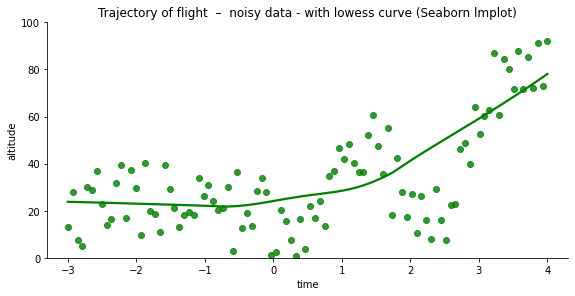

In [91]:
custom_title = title + '  –  noisy data' + ' - with lowess curve (Seaborn lmplot)'

import seaborn as sns
import pandas as pd

plt.figure(figsize=figure_proportions)
plot_df = pd.DataFrame({'time': in_array, 'altitude': noisy_data})
g=sns.lmplot(x='time', y='altitude', data=plot_df, \
             lowess=True, scatter_kws={'color': 'green'}, line_kws={'color': 'green'},\
             height = figure_proportions[1]*.8, aspect = figure_proportions[0]/figure_proportions[1]);
g.set(title=custom_title)
g.set(ylim=(0, y_max))
g.set(xlim=(x_min, x_max))

### Lowess (fit)

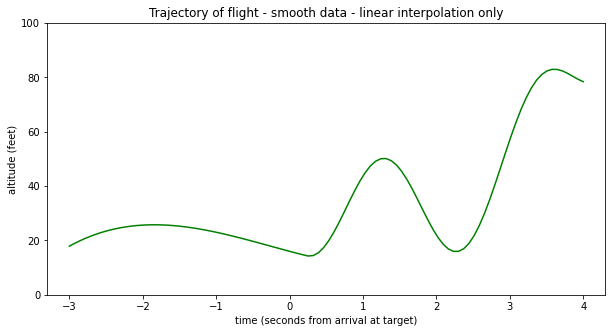

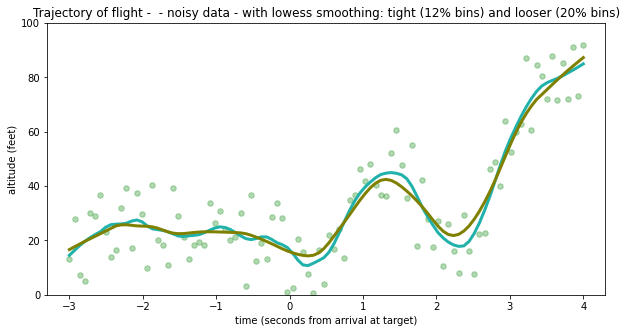

In [92]:
# ground truth linear interpolation
title_suffix = 'smooth data' + ' - linear interpolation only'
graph(in_array, curve, title_suffix, scatter=False, solid_line=True)

# two LOWESS curves
custom_title = title + '  –  noisy data' + ' with lowess smoothing: tight (12% bins) and looser (20% bins)'
from statsmodels.nonparametric.smoothers_lowess import lowess
lowess_tight = lowess(noisy_data, in_array, frac = .12)
lowess_loose = lowess(noisy_data, in_array, frac = .2)
lowess_list = [(lowess_tight[:,0], lowess_tight[:,1]), (lowess_loose[:,0], lowess_loose[:,1]) ]
graph(in_array, noisy_data,  ' - noisy data'+ ' - with lowess smoothing: tight (12% bins) and looser (20% bins)', scatter=True, solid_line=False, line_viz = lowess_list)


### B-Splines

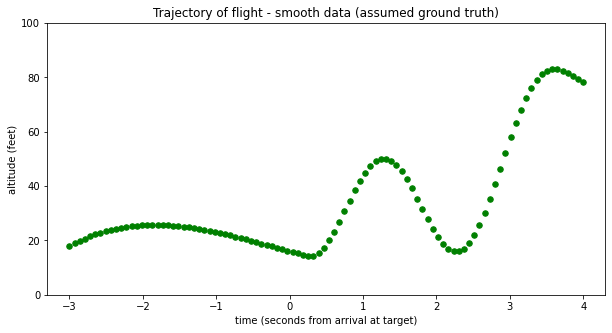

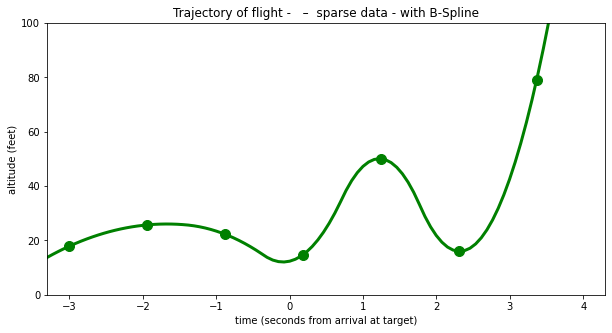

In [93]:
title_suffix = 'smooth data (assumed ground truth)'
graph(in_array, curve, title_suffix , scatter=True, solid_line=False)

title_suffix = '  –  sparse data' +   ' - with B-Spline'
import scipy

x_interp = np.linspace(x_min, x_max, 100)
BSpline = scipy.interpolate.make_interp_spline(sparse_input, sparse_data, 2)
y_BSpline = BSpline(x_interp)

spline_duple = [(x_interp, y_BSpline)  ]
graph(sparse_input, sparse_data, title_suffix, scatter=True, solid_line=False, line_viz = spline_duple)


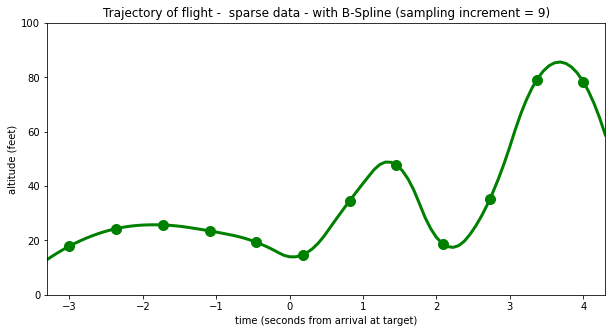

In [95]:
#samling

sampling_increment = 9   # instead of 15
sparse_input = in_array[::sampling_increment]
sparse_data = curve[::sampling_increment]

title_suffix = ' sparse data' +   ' - with B-Spline (sampling increment = 9)'

x_interp = np.linspace(x_min, x_max, 100)
BSpline = scipy.interpolate.make_interp_spline(sparse_input, sparse_data, 2)
y_BSpline = BSpline(x_interp)

spline_duple = [(x_interp, y_BSpline)  ]
graph(sparse_input, sparse_data, title_suffix, scatter=True, solid_line=False, line_viz = spline_duple)
